# Diabetes Prediction 

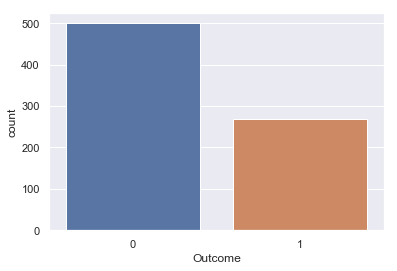

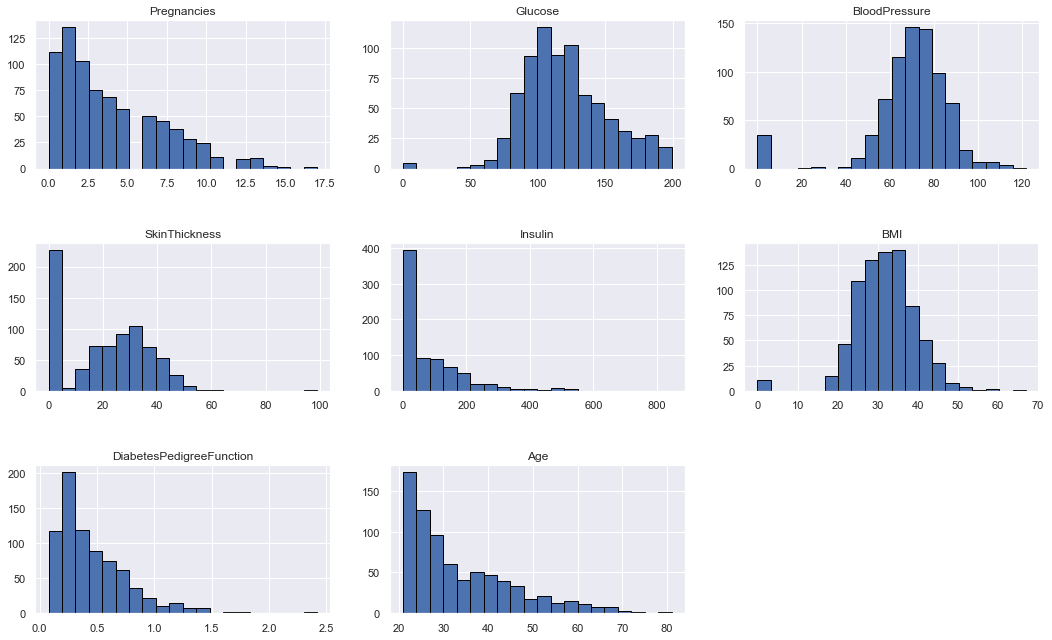

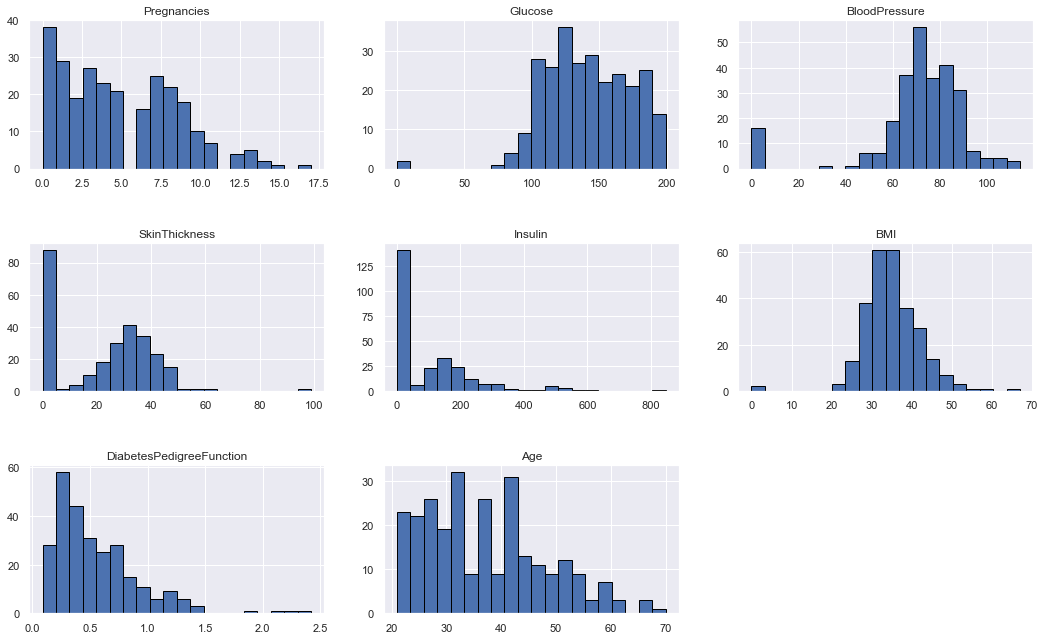

(576, 8)
The accuracy of the Logistic Regression is 0.8072916666666666
The accuracy of the Decision Tree is 0.703125


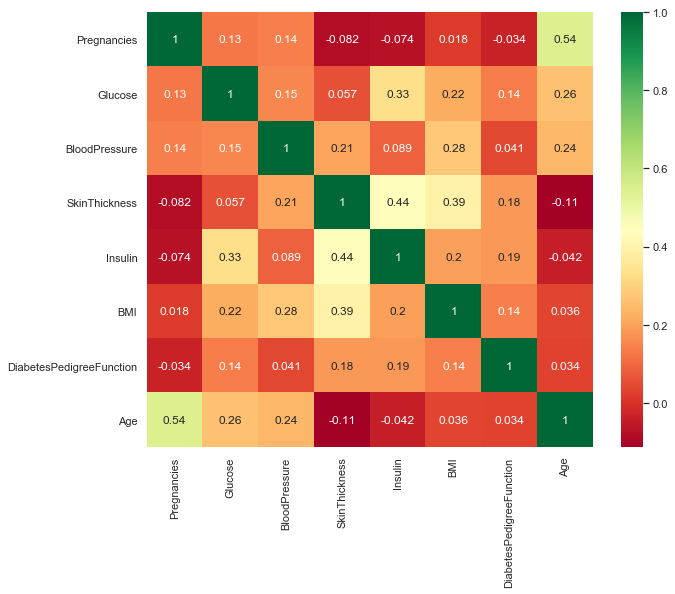

,CV Mean
Linear Svm,0.781250
Logistic Regression,0.776042
Decision Tree,0.734375


In [30]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import itertools
import seaborn as sns;sns.set(font_scale=1.2);sns.set(color_codes=False)
from sklearn.metrics import accuracy_score

dset=pd.read_csv('diabetes.csv')
dset.head()

X=dset.iloc[:,0:8]
Y=dset.iloc[:,8]

#DATA PLOT LINE:
sns.countplot(x='Outcome',data=dset)
plt.show()

# Analysis of data
columns=dset.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# Analysis of Diabetes
diab1=dset[dset['Outcome']==1]
columns=dset.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

#DIVISION INTO TEST,TRAIN SETS
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape)

#GRID SEARCH TO FIND BEST C AND GAMMA
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, Y)
        score = svc.score(X,Y)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
C=best_params['C']
gamma=best_params['gamma']

#KERNEL
model=svm.SVC(kernel='linear',C=1,gamma=2**5)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
accuracy_score(y_pred, Y_test)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',accuracy_score(prediction,Y_test))

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,Y_test))

# IN THE NUTSHELL
abc=[]
classifiers=['Linear Svm','Logistic Regression','Decision Tree']
models=[svm.SVC(kernel='linear'),LogisticRegression(),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(X_train,Y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,Y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe
#----------------------------------------------------------------------------------

# For Feature Selection
sns.heatmap(dset[dset.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=dset[dset.columns[:8]]
Y=dset['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

# Now Using Only Important Features.
diab2=dset[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
from sklearn.preprocessing import StandardScaler #Standardisation
features=diab2[diab2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=diab2['Outcome']
outcome=x['Outcome']
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

abc=[]
classifiers=['Linear Svm','Logistic Regression','Decision Tree']
models=[svm.SVC(kernel='linear'),LogisticRegression(),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy']    

new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

# Cross Validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts


xyz=[]
accuracy=[]
classifiers=['Linear Svm','Logistic Regression','Decision Tree']
models=[svm.SVC(kernel='linear'),LogisticRegression(),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x[x.columns[:4]],x['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2



